In [53]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [54]:
# data
data = pd.read_pickle("./raw_data_2/top1000thPlayers.pkl")

players_1000th_final = pd.read_pickle("./raw_data_2/players_1000th_final.pkl")

In [55]:
# Descriptive Analysis - Basic Statistics and Country Distribution

# Converting earnings related columns to numerical values for statistical analysis
earnings_columns = ['Total Earnings', 'Game Earnings'] + [f'Total_{year}' for year in range(2001, 2024)]
data[earnings_columns] = data[earnings_columns].replace('[\$,]', '', regex=True).astype(float)

# Basic Statistics for Age and Earnings
age_stats = data['Age'].describe()
total_earnings_stats = data['Total Earnings'].describe()

# Country Distribution
country_distribution = data['Country'].value_counts()

age_stats, total_earnings_stats, country_distribution.head(10)  # Displaying top 10 countries for brevity

(count     991
 unique     27
 top         0
 freq      180
 Name: Age, dtype: int64,
 count    9.910000e+02
 mean     7.386115e+05
 std      8.031631e+05
 min      2.813821e+05
 25%      3.477924e+05
 50%      4.670669e+05
 75%      7.468380e+05
 max      7.184163e+06
 Name: Total Earnings, dtype: float64,
 Country
 China                 201
 United States         173
 Korea, Republic of    117
 Russian Federation     53
 Denmark                43
 France                 36
 Sweden                 36
 Brazil                 28
 Canada                 26
 Ukraine                22
 Name: count, dtype: int64)

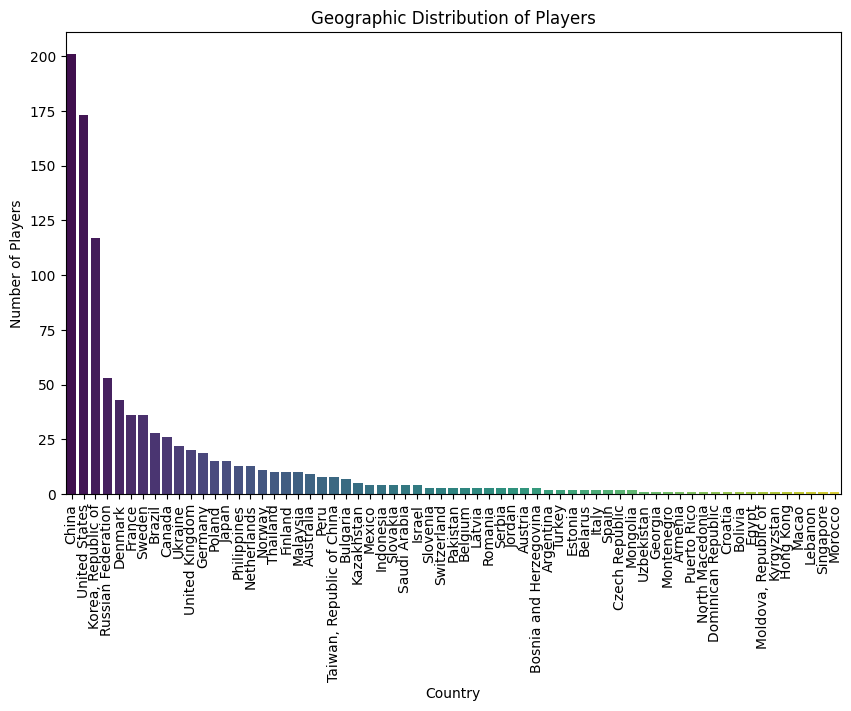

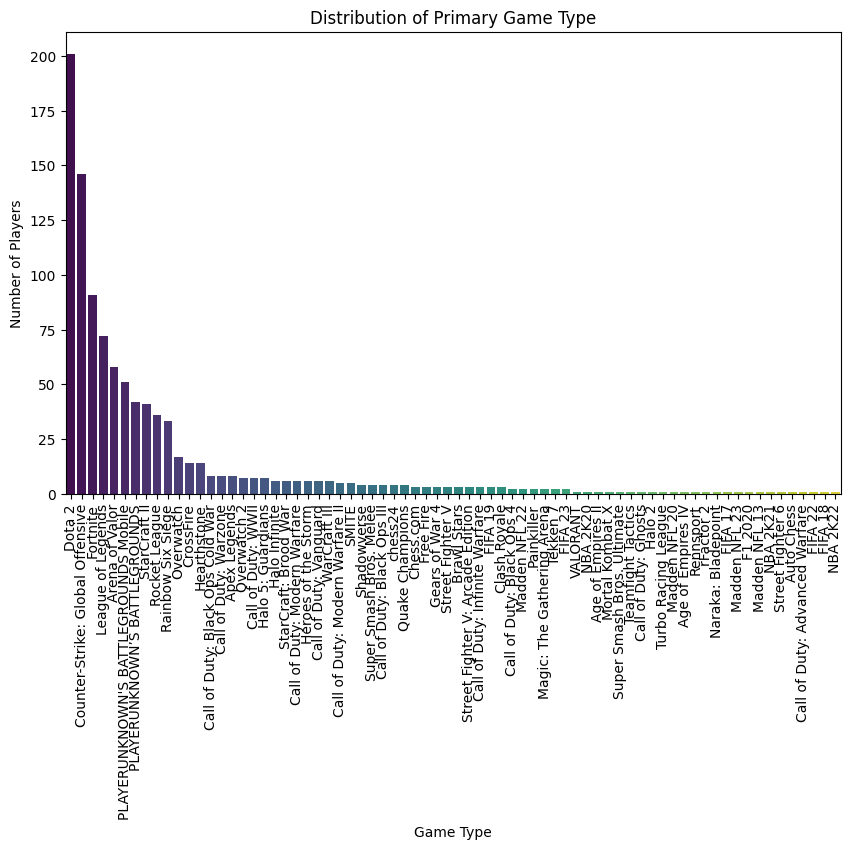

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical analysis
stats = data.describe()

# Geographic analysis (Country-based statistics)
country_stats = data['Country'].value_counts()

# Game type analysis (assuming 'Primary Game' includes the game type)
game_stats = data['Primary Game'].value_counts()

# Analysis of players' age (assuming the dataset contains a column for age)
# If there's no direct age column, we can't perform this analysis without birthdate data

# Preparing for visualizations
# Geographic distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y=country_stats.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Geographic Distribution of Players')
plt.ylabel('Number of Players')
plt.xlabel('Country')

# Game type distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=game_stats.index, y=game_stats.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Primary Game Type')
plt.ylabel('Number of Players')
plt.xlabel('Game Type')

# Display the visualizations
plt.show()

# (stats, country_stats.head(), game_stats.head())  # Displaying a subset of the results for brevity

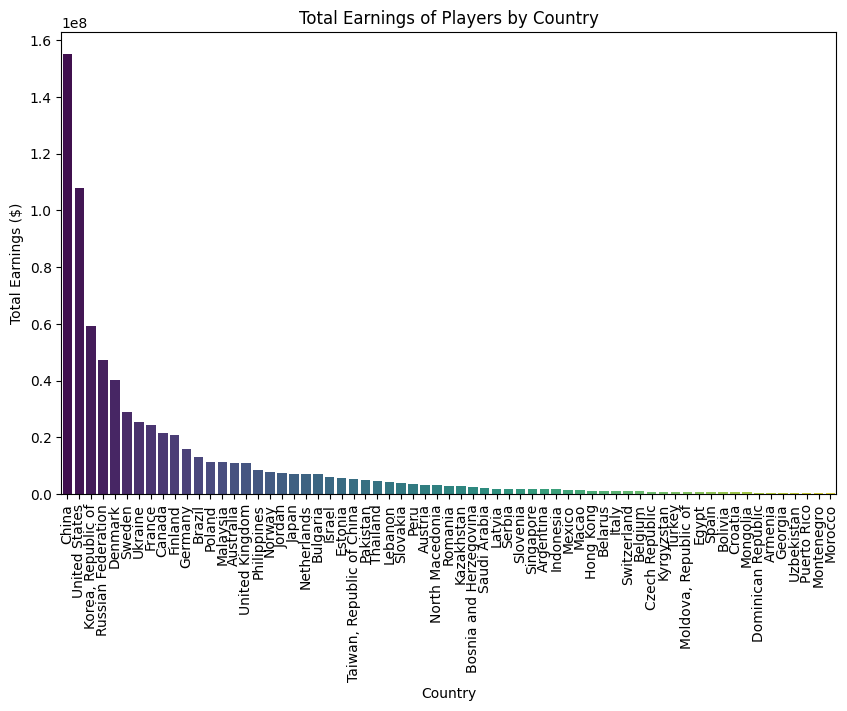

In [57]:
# Convert 'Total Earnings' to numeric for analysis
data['Total Earnings'] = data['Total Earnings'].replace('[\$,]', '', regex=True).astype(float)

# Total earnings by country
earnings_by_country = data.groupby('Country')['Total Earnings'].sum().sort_values(ascending=False)

# Visualization of total earnings by country
plt.figure(figsize=(10, 6))
sns.barplot(x=earnings_by_country.index, y=earnings_by_country.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Earnings of Players by Country')
plt.ylabel('Total Earnings ($)')
plt.xlabel('Country')

# Display the visualization
plt.show()

# earnings_by_country.head()  # Displaying a subset of the results for brevity

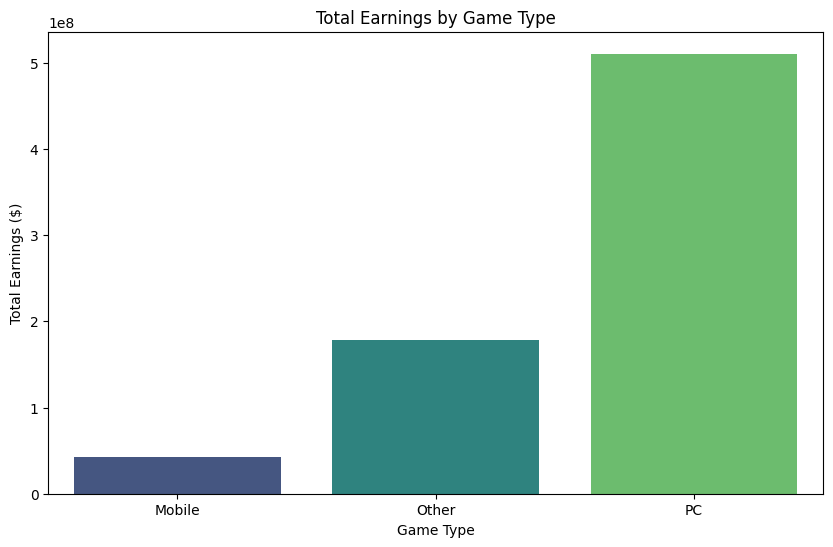

Game Type
Mobile    4.298742e+07
Other     1.785544e+08
PC        5.104221e+08
Name: Total Earnings, dtype: float64

In [58]:
# Assuming the dataset contains information to distinguish between mobile and PC games
# This could be inferred from the 'Primary Game' column or another similar column
# For demonstration, we'll classify some known games into Mobile or PC categories
# This is a simplified approach and may not cover all games accurately

# Known Mobile and PC games
mobile_games = ['Arena of Valor', 'Mobile Legends', 'Clash Royale', 'PUBG Mobile']
pc_games = ['Dota 2', 'Counter-Strike: Global Offensive', 'Fortnite', 'League of Legends', 'StarCraft II']

# Classifying games in the dataset
data['Game Type'] = data['Primary Game'].apply(lambda x: 'Mobile' if x in mobile_games else ('PC' if x in pc_games else 'Other'))

# Total earnings by game type
earnings_by_game_type = data.groupby('Game Type')['Total Earnings'].sum()

# Visualization of total earnings by game type
plt.figure(figsize=(10, 6))
sns.barplot(x=earnings_by_game_type.index, y=earnings_by_game_type.values,palette='viridis')
plt.title('Total Earnings by Game Type')
plt.ylabel('Total Earnings ($)')
plt.xlabel('Game Type')

# Display the visualization
plt.show()

earnings_by_game_type

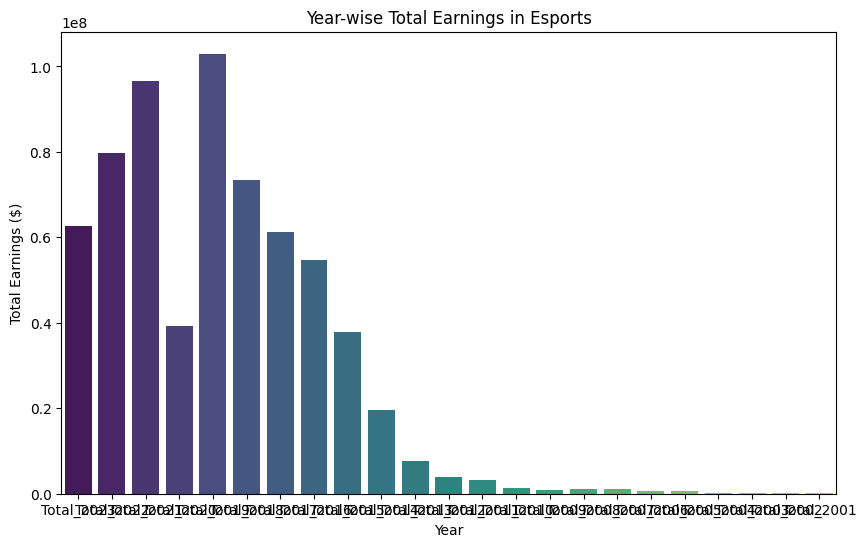

(count    9.910000e+02
 mean     7.386115e+05
 std      8.031631e+05
 min      2.813821e+05
 25%      3.477924e+05
 50%      4.670669e+05
 75%      7.468380e+05
 max      7.184163e+06
 Name: Total Earnings, dtype: float64,
                      Age  Total Earnings
 Age             1.000000        0.191324
 Total Earnings  0.191324        1.000000,
 Total_2023    6.256246e+07
 Total_2022    7.974629e+07
 Total_2021    9.656805e+07
 Total_2020    3.931149e+07
 Total_2019    1.029891e+08
 Total_2018    7.336409e+07
 Total_2017    6.120648e+07
 Total_2016    5.471576e+07
 Total_2015    3.793390e+07
 Total_2014    1.959616e+07
 Total_2013    7.620705e+06
 Total_2012    3.932307e+06
 Total_2011    3.153369e+06
 Total_2010    1.210252e+06
 Total_2009    7.219353e+05
 Total_2008    9.683716e+05
 Total_2007    1.159963e+06
 Total_2006    5.650108e+05
 Total_2005    7.024205e+05
 Total_2004    1.719463e+05
 Total_2003    4.680575e+04
 Total_2002    2.684641e+04
 Total_2001    5.392265e+04
 dtype

In [59]:
# 1. Earnings Distribution Analysis
earnings_distribution = data['Total Earnings'].describe()

# 2. Earnings and Age Relationship (if age data is available)
if 'Age' in data.columns:
    age_earnings_corr = data[['Age', 'Total Earnings']].corr()

# 3. Year-wise Earnings Trends (assuming dataset contains year-wise earnings)
yearly_earnings_columns = [col for col in data.columns if col.startswith('Total_')]
yearly_earnings = data[yearly_earnings_columns].sum()

# Top 10 players by total earnings
top_players = data.nlargest(10, 'Total Earnings')[['Player Name', 'Total Earnings', 'Country']]

# 5. Average Earnings per Country
average_earnings_country = data.groupby('Country')['Total Earnings'].mean().sort_values(ascending=False)

# Yearly Earnings Trends
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_earnings.index, y=yearly_earnings.values,palette='viridis')
# yearly_earnings.plot(kind='bar')
plt.title('Year-wise Total Earnings in Esports')
plt.ylabel('Total Earnings ($)')
plt.xlabel('Year')

# Display the visualization
plt.show()

(earnings_distribution, age_earnings_corr if 'Age' in data.columns else "Age data not available", yearly_earnings, top_players, average_earnings_country.head())


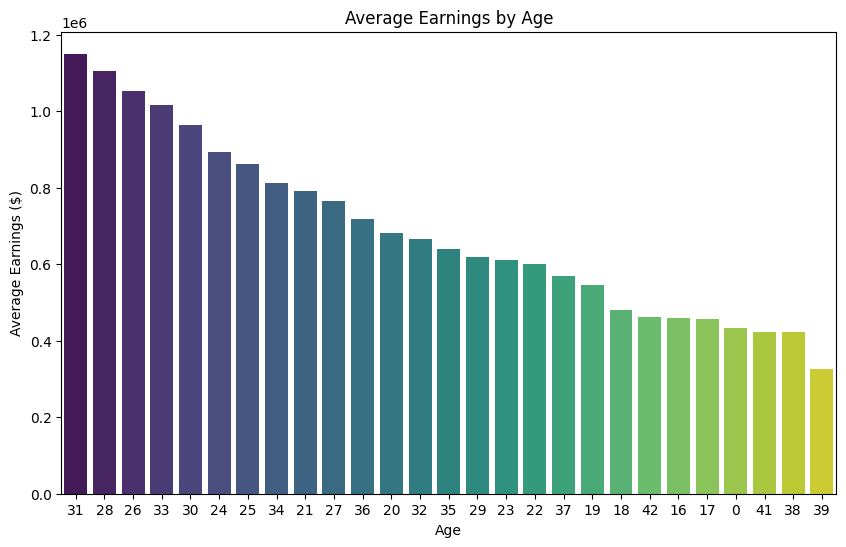

In [60]:
# Analysis of earnings by age (if age data is available)
if 'Age' in data.columns:
    # Grouping data by age and calculating average earnings for each age
    earnings_by_age = data.groupby('Age')['Total Earnings'].mean().sort_values(ascending=False)

    # Visualization of average earnings by age
    plt.figure(figsize=(10, 6))
    sns.barplot(x=earnings_by_age.index, y=earnings_by_age.values,palette='viridis')
    plt.title('Average Earnings by Age')
    plt.ylabel('Average Earnings ($)')
    plt.xlabel('Age')

    # Display the visualization
    plt.show()

    earnings_by_age
else:
    earnings_by_age = "Age data not available"


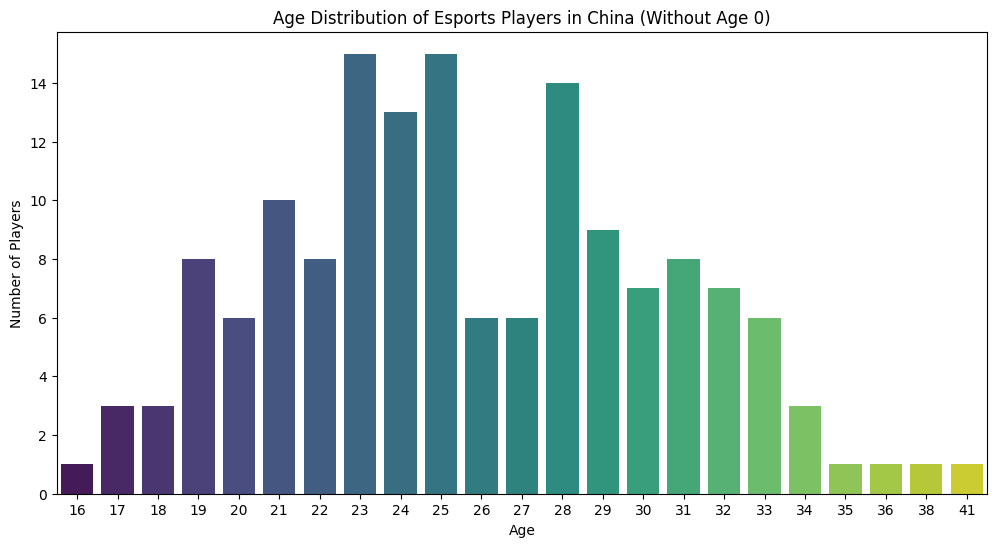

Primary Game
Dota 2                                  60
Arena of Valor                          47
Fortnite                                29
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile    19
League of Legends                       13
Name: count, dtype: int64

In [61]:
# Eliminating entries with age 0 as it doesn't make sense
data_cleaned = data[data['Age'] != 0]

# Filter the cleaned dataset for players from the USA and China
data_usa_china_cleaned = data_cleaned[data_cleaned['Country'].isin(['United States', 'China'])]

# Age distribution in China without age 0
china_data_cleaned = data_cleaned[data_cleaned['Country'] == 'China']
age_distribution_china_cleaned = china_data_cleaned['Age'].value_counts().sort_index()

# Visualization of age distribution in China without age 0
plt.figure(figsize=(12, 6))
sns.barplot(x=age_distribution_china_cleaned.index, y=age_distribution_china_cleaned.values, palette='viridis')
plt.title('Age Distribution of Esports Players in China (Without Age 0)')
plt.xlabel('Age')
plt.ylabel('Number of Players')

# Display the visualization
plt.show()

# Types of games played in USA and China in the cleaned data
games_usa_china_cleaned = data_usa_china_cleaned['Primary Game'].value_counts()

games_usa_china_cleaned.head()  # Displaying a subset for brevity


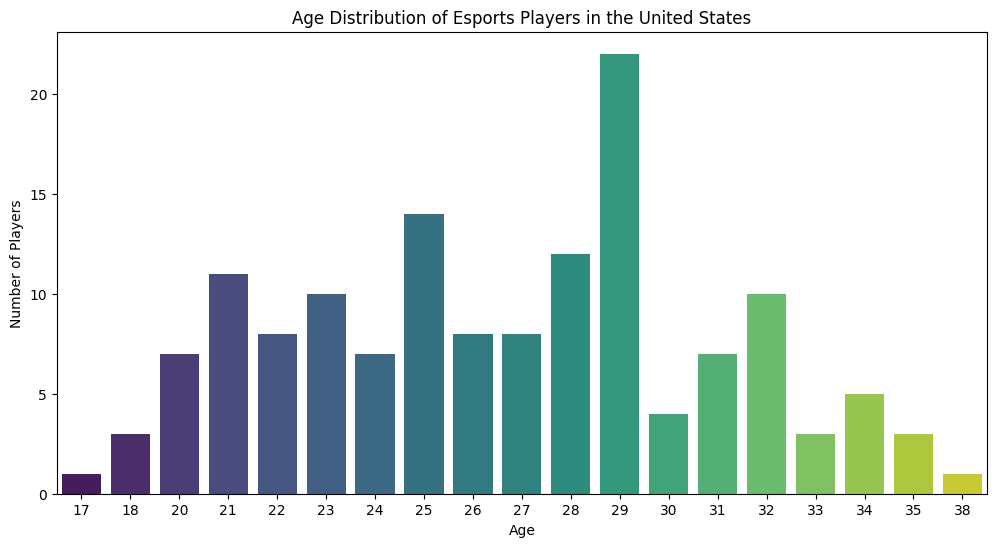

In [62]:
# Age distribution in the United States
usa_data_cleaned = data_cleaned[data_cleaned['Country'] == 'United States']
age_distribution_usa_cleaned = usa_data_cleaned['Age'].value_counts().sort_index()

# Visualization of age distribution in the United States
plt.figure(figsize=(12, 6))
sns.barplot(x=age_distribution_usa_cleaned.index, y=age_distribution_usa_cleaned.values, palette='viridis')
plt.title('Age Distribution of Esports Players in the United States')
plt.xlabel('Age')
plt.ylabel('Number of Players')

# Display the visualization
plt.show()

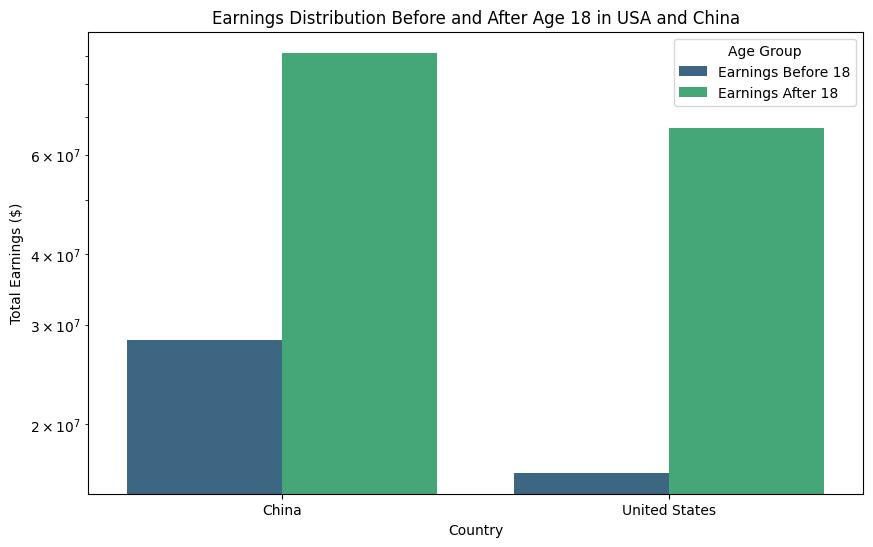

In [63]:
# Correcting the calculation based on the new understanding

def calculate_earnings_around_18_updated(row):
    age_18_year = 2023 - (int(row['Age']) - 18)
    earnings_before_18 = 0
    earnings_after_18 = 0

    for year in range(2001, 2024):
        year_column = f'Total_{year}'
        if year_column in row.index and pd.notnull(row[year_column]):
            year_earnings = float(row[year_column])

            if year <= age_18_year:
                earnings_before_18 += year_earnings
            else:
                earnings_after_18 += year_earnings

    return pd.Series([earnings_before_18, earnings_after_18])

# Apply the updated function to the dataset
data_cleaned[['Earnings Before 18', 'Earnings After 18']] = data_cleaned.apply(calculate_earnings_around_18_updated, axis=1)

# Filter for USA and China
data_usa_china_earnings_age_updated = data_cleaned[data_cleaned['Country'].isin(['United States', 'China'])]

# Earnings distribution before and after age 18 in USA and China
earnings_distribution_usa_china_updated = data_usa_china_earnings_age_updated.groupby('Country')[['Earnings Before 18', 'Earnings After 18']].sum()

# Creating a graph for the earnings distribution
earnings_distribution_usa_china_updated = earnings_distribution_usa_china_updated.reset_index()

# Melting the DataFrame for easier plotting
earnings_melted = earnings_distribution_usa_china_updated.melt(id_vars='Country', 
                                                               value_vars=['Earnings Before 18', 'Earnings After 18'],
                                                               var_name='Age Group', 
                                                               value_name='Earnings')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=earnings_melted, x='Country', y='Earnings', hue='Age Group', palette='viridis')
plt.title('Earnings Distribution Before and After Age 18 in USA and China')
plt.xlabel('Country')
plt.ylabel('Total Earnings ($)')
plt.yscale('log')  # Using a logarithmic scale due to large differences in earnings

# Display the graph
plt.show()


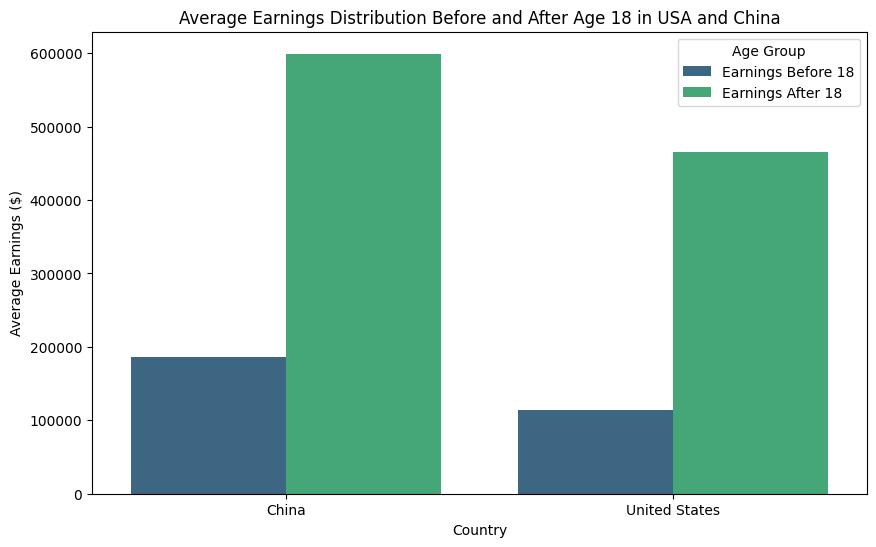

In [64]:
# Calculating average earnings before and after age 18 in USA and China
average_earnings_usa_china = data_usa_china_earnings_age_updated.groupby('Country')[['Earnings Before 18', 'Earnings After 18']].mean()

# Creating a graph for the average earnings distribution
average_earnings_usa_china = average_earnings_usa_china.reset_index()

# Melting the DataFrame for easier plotting
average_earnings_melted = average_earnings_usa_china.melt(id_vars='Country', 
                                                          value_vars=['Earnings Before 18', 'Earnings After 18'],
                                                          var_name='Age Group', 
                                                          value_name='Average Earnings')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_earnings_melted, x='Country', y='Average Earnings', hue='Age Group', palette='viridis')
plt.title('Average Earnings Distribution Before and After Age 18 in USA and China')
plt.xlabel('Country')
plt.ylabel('Average Earnings ($)')

# Display the graph
plt.show()

Total_2023    6.256246e+07
Total_2022    7.974629e+07
Total_2021    9.656805e+07
Total_2020    3.931149e+07
Total_2019    1.029891e+08
Total_2018    7.336409e+07
Total_2017    6.120648e+07
Total_2016    5.471576e+07
Total_2015    3.793390e+07
Total_2014    1.959616e+07
Total_2013    7.620705e+06
Total_2012    3.932307e+06
Total_2011    3.153369e+06
Total_2010    1.210252e+06
Total_2009    7.219353e+05
Total_2008    9.683716e+05
Total_2007    1.159963e+06
Total_2006    5.650108e+05
Total_2005    7.024205e+05
Total_2004    1.719463e+05
Total_2003    4.680575e+04
Total_2002    2.684641e+04
Total_2001    5.392265e+04
dtype: float64


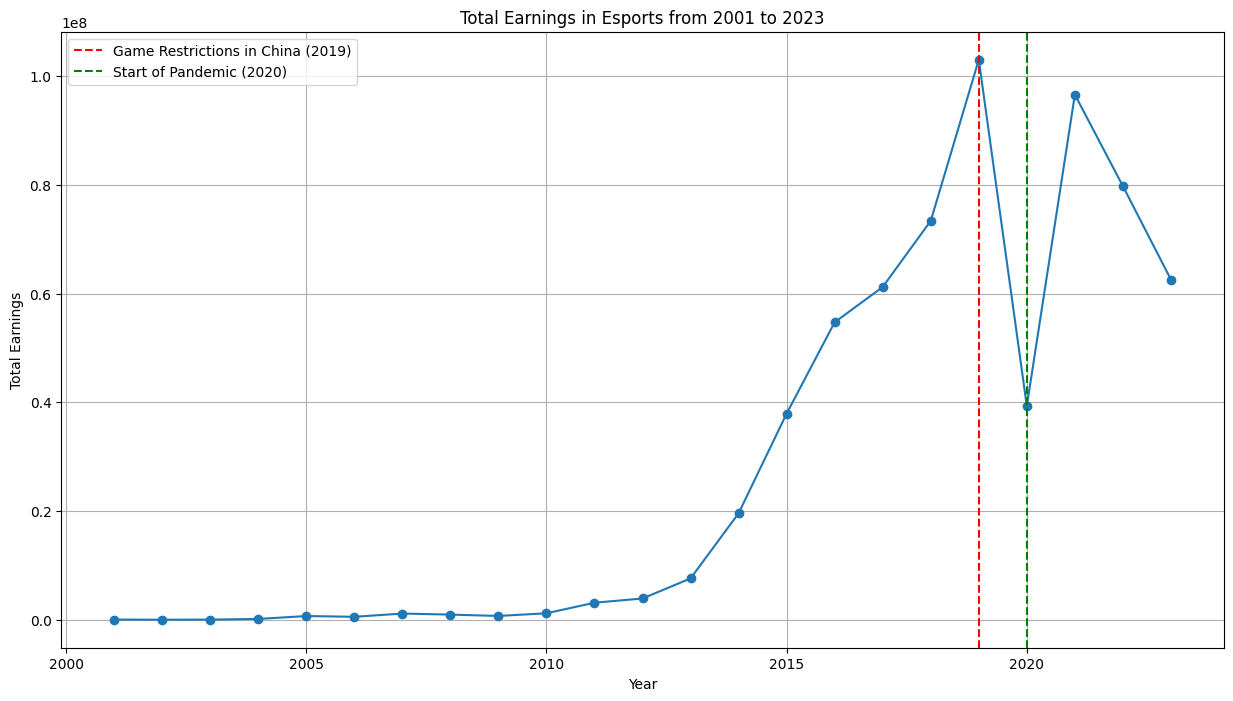

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'players_1000th' and 'df_total_earning_each_year' are already loaded from previous steps
# If not, we would need to load these dataframes from relevant files or recreate them from the provided code

# First, let's check if 'players_1000th' is available in the current context
players_1000th_available = 'data' in locals()

# Now, improving the plotting code
if players_1000th_available:

    # Extract year columns from 'players_1000th'
    year_columns = [col for col in data.columns if col.startswith('Total_')]

    # Selecting the yearly earnings columns
    yearly_earnings = data[year_columns]
    # Convert all columns to numeric, non-numeric values are converted to NaN
    yearly_earnings = yearly_earnings.apply(pd.to_numeric, errors='coerce')

    # Summing up the earnings for each year
    total_earnings_by_year = yearly_earnings.sum()
    print(total_earnings_by_year)
    # print(players_1000th[['Total_2003', 'Total_2002', 'Total_2001']])
    # print(yearly_earnings[['Total_2003', 'Total_2002', 'Total_2001']])
    # print(total_earnings_by_year[['Total_2003', 'Total_2002', 'Total_2001']])
    
    # Converting the index to int for better plotting (removing 'Total_' prefix and converting to int)
    total_earnings_by_year.index = [int(year[6:]) for year in total_earnings_by_year.index]
    
    # Sorting the index to ensure the years are in chronological order
    total_earnings_by_year.sort_index(inplace=True)

    # Plotting the time series
    plt.figure(figsize=(15, 8))
    plt.plot(total_earnings_by_year.index, total_earnings_by_year.values, marker='o')
    plt.title('Total Earnings in Esports from 2001 to 2023')
    plt.xlabel('Year')
    plt.ylabel('Total Earnings')
    plt.grid(True)
    plt.axvline(x=2019, color='r', linestyle='--', label='Game Restrictions in China (2019)')
    plt.axvline(x=2020, color='g', linestyle='--', label='Start of Pandemic (2020)')
    plt.legend()
    plt.show()
else:
    players_1000th_available


## CHINESE RESTRICTION vs USA WITHOUT RESTRICTION

      Rank   Player Tag    Player Name  Total Earnings Country  \
36      19           y`  Zhang, Yiping      3932492.20   China   
38      20          Ame   Wang, Chunyu      3912904.27   China   
40      21   Faith_bian   Zhang, Ruida      3847231.98   China   
44      23       Somnus        Lu, Yao      3311116.16   China   
48      25           fy     Xu, Linsen      3104045.98   China   
...    ...          ...            ...             ...     ...   
1051   953        XHope           -, -       294845.18   China   
1057   959        SuNan  Su, Xuezhuang       292176.48   China   
1059   961          bin   Chen, Ze Bin       290866.05   China   
1060   962         Zhou      Chen, Yao       290746.09   China   
1097   999  xiaohaixxxx  Zhang, Jinhai       281500.90   China   

                              Primary Game  Game Earnings Earnings Percentage  \
36                                  Dota 2     3932492.20             100.00%   
38                                  Dota 2   

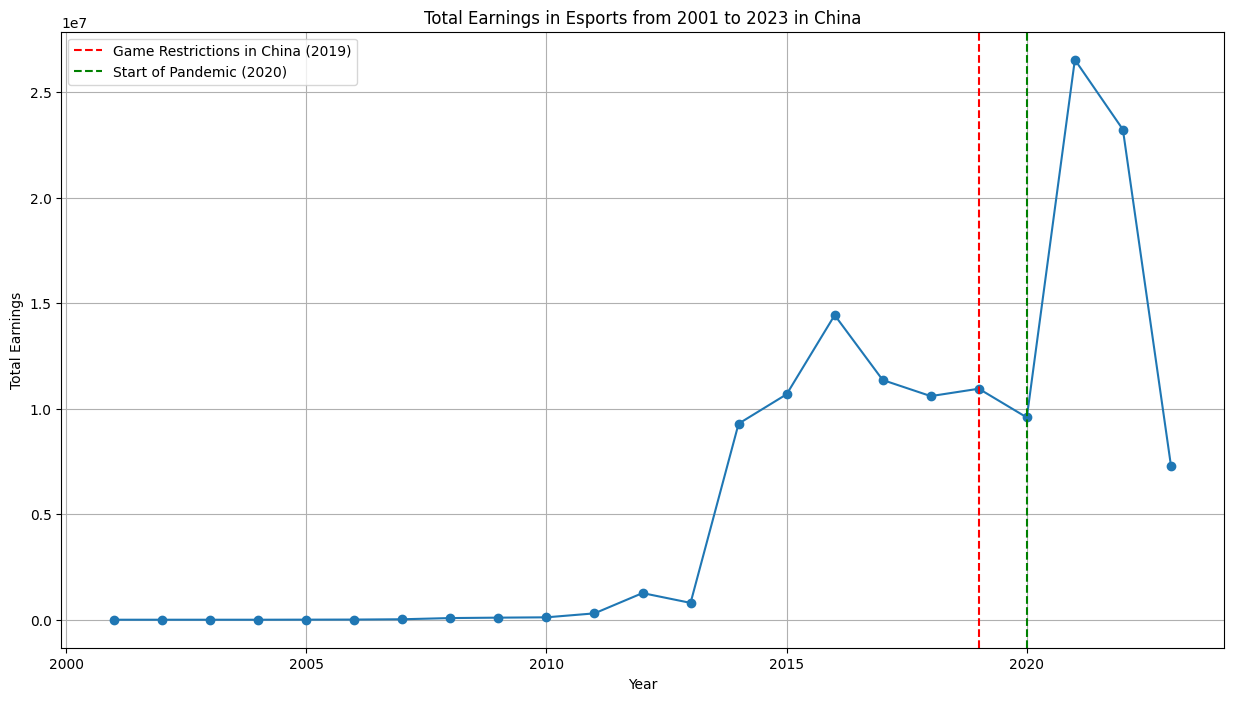

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'players_1000th' and 'df_total_earning_each_year' are already loaded from previous steps
# If not, we would need to load these dataframes from relevant files or recreate them from the provided code

# First, let's check if 'players_1000th' is available in the current context
players_1000th_available = 'data' in locals()

# Now, improving the plotting code
if players_1000th_available:
    #Extract the data from China
    data_china = data[data['Country'] == 'China']
    print(data_china)
    # Extract year columns from 'players_1000th'
    year_columns = [col for col in data_china.columns if col.startswith('Total_')]

    # Selecting the yearly earnings columns
    yearly_earnings = data_china[year_columns]
    # Convert all columns to numeric, non-numeric values are converted to NaN
    yearly_earnings = yearly_earnings.apply(pd.to_numeric, errors='coerce')

    # Summing up the earnings for each year
    total_earnings_by_year = yearly_earnings.sum()
    print(total_earnings_by_year)
    # print(players_1000th[['Total_2003', 'Total_2002', 'Total_2001']])
    # print(yearly_earnings[['Total_2003', 'Total_2002', 'Total_2001']])
    # print(total_earnings_by_year[['Total_2003', 'Total_2002', 'Total_2001']])
    
    # Converting the index to int for better plotting (removing 'Total_' prefix and converting to int)
    total_earnings_by_year.index = [int(year[6:]) for year in total_earnings_by_year.index]
    
    # Sorting the index to ensure the years are in chronological order
    total_earnings_by_year.sort_index(inplace=True)

    # Plotting the time series
    plt.figure(figsize=(15, 8))
    plt.plot(total_earnings_by_year.index, total_earnings_by_year.values, marker='o')
    plt.title('Total Earnings in Esports from 2001 to 2023 in China')
    plt.xlabel('Year')
    plt.ylabel('Total Earnings')
    plt.grid(True)
    plt.axvline(x=2019, color='r', linestyle='--', label='Game Restrictions in China (2019)')
    plt.axvline(x=2020, color='g', linestyle='--', label='Start of Pandemic (2020)')
    plt.legend()
    plt.show()
else:
    players_1000th_available


In [101]:
from datetime import datetime

# Extracting the relevant columns from the dataframe and creating a copy
player_age_revenue = players_1000th_final[['Player Name', 'Date of Birth', 'Age'] + [f'Total_{year}' for year in range(2001, 2023)]].copy()

# Convert 'Date of Birth' to datetime and calculate the year of turning 18
player_age_revenue['Date of Birth'] = pd.to_datetime(player_age_revenue['Date of Birth'], errors='coerce')
player_age_revenue['Year Turned 18'] = player_age_revenue['Date of Birth'].apply(lambda x: x.year + 18 if pd.notnull(x) else None)

# Initialize columns for total earnings before and after turning 18
player_age_revenue['Total Before 18'] = 0.0
player_age_revenue['Total After 18'] = 0.0
player_age_revenue['Years Before 18'] = 0
player_age_revenue['Years After 18'] = 0

# Iterate over each row and sum the earnings
for index, row in player_age_revenue.iterrows():
    year_turned_18 = row['Year Turned 18']
    for year in range(2001, 2023):
        earning = row[f'Total_{year}']
        if pd.notnull(earning) and earning != 0 and players_1000th_final.at[index, 'Country'] == 'China':
            # Convert string earnings to float after removing currency symbols and commas
            try:
                earning = float(earning.replace('$', '').replace(',', ''))
            except ValueError:
                continue

            if year_turned_18 and year < year_turned_18:
                player_age_revenue.at[index, 'Total Before 18'] += earning
                player_age_revenue.at[index, 'Years Before 18'] += 1                
            elif year_turned_18 and year >= year_turned_18:
                player_age_revenue.at[index, 'Total After 18'] += earning
                player_age_revenue.at[index, 'Years After 18'] += 1                
                

player_age_revenue = player_age_revenue.drop_duplicates()

# Sort the DataFrame in ascending order by 'Total Before 18'
player_age_revenue = player_age_revenue.sort_values('Total Before 18')

# Display the DataFrame
player_age_revenue[['Player Name', 'Total Before 18', 'Total After 18', 'Years Before 18', 'Years After 18']]

,Player Name,Total Before 18,Total After 18,Years Before 18,Years After 18
0,Johan Sundstein,0.00,0.0,0,0
755,"Kim, Doh Wook",0.00,0.0,0,0
756,Alexander Kucheria,0.00,0.0,0,0
757,"Park, Tae Won",0.00,0.0,0,0
758,Gabriel Vieira,0.00,0.0,0,0
...,...,...,...,...,...
247,"Lei, Zengrong",1111886.22,0.0,8,0
225,"Liu, Jiajun",1165238.16,0.0,6,0
231,"Wang, Zhaohui",1205074.12,0.0,6,0
216,"Jiao, Wang",1277193.89,0.0,6,0


In [102]:
from datetime import datetime

# Extracting the relevant columns from the dataframe and creating a copy
player_age_revenue = players_1000th_final[['Player Name', 'Date of Birth', 'Age', 'Country', 'Player Tag'] + [f'Total_{year}' for year in range(2001, 2023)]].copy()

# Convert 'Date of Birth' to datetime and calculate the year of turning 18
player_age_revenue['Date of Birth'] = pd.to_datetime(player_age_revenue['Date of Birth'], errors='coerce')
player_age_revenue['Year Turned 18'] = player_age_revenue['Date of Birth'].apply(lambda x: x.year + 18 if pd.notnull(x) else None)

# Filter for players from China
player_age_revenue = player_age_revenue[player_age_revenue['Country'] == 'China']

# Initialize columns for total earnings for each year before turning 18
for year in range(2001, 2023):
    player_age_revenue[f'Total_{year}_Before_18'] = 0.0

# Iterate over each row and sum the earnings
for index, row in player_age_revenue.iterrows():
    year_turned_18 = row['Year Turned 18']
    for year in range(2001, 2023):
        earning = row[f'Total_{year}']
        if pd.notnull(earning) and earning != 0:
            # Convert string earnings to float after removing currency symbols and commas
            try:
                earning = float(earning.replace('$', '').replace(',', ''))
            except ValueError:
                continue

            if year_turned_18 and year < year_turned_18:
                player_age_revenue.at[index, f'Total_{year}_Before_18'] = earning

player_age_revenue = player_age_revenue.drop_duplicates()

# Display the DataFrame
player_age_revenue[['Player Name'] + [f'Total_{year}_Before_18' for year in range(2013, 2016)]]

,Player Name,Total_2013_Before_18,Total_2014_Before_18,Total_2015_Before_18
36,"Zhang, Yiping",0.00,0.00,0.0
38,"Wang, Chunyu",0.00,0.00,0.0
40,"Zhang, Ruida",0.00,0.00,0.0
44,"Lu, Yao",0.00,0.00,0.0
48,"Xu, Linsen",0.00,0.00,0.0
...,...,...,...,...
1051,"-, -",0.00,0.00,0.0
1057,"Su, Xuezhuang",0.00,0.00,0.0
1059,"Chen, Zebin",0.00,0.00,0.0
1060,"Chen, Yao",34143.16,12701.25,0.0


In [103]:
# Create a new column for the total earnings from 2013 to 2015
player_age_revenue['Total_2013_to_2015'] = player_age_revenue[[f'Total_{year}_Before_18' for year in range(2015, 2016)]].sum(axis=1)

# Sort the DataFrame by the new column
player_age_revenue_sorted = player_age_revenue.sort_values(by='Total_2013_to_2015')

# Display the sorted DataFrame
player_age_revenue_sorted[['Player Name', 'Player Tag', 'Total_2013_to_2015']]

,Player Name,Player Tag,Total_2013_to_2015
36,"Zhang, Yiping",y`,0.00
632,"Kang, Junlong",JiuLong,0.00
636,"Bai, Jiahao",369,0.00
638,"Ye, Zhiwei",YZZ,0.00
645,"Song, Hongqi",Baby,0.00
...,...,...,...
406,"Huang, Jiwei",Shiki,644599.28
375,"Chen, Zezhi",Xz,644599.28
369,"Liu, Xinzhou",garder,651447.48
255,"Fu, Bin",Q,651447.48


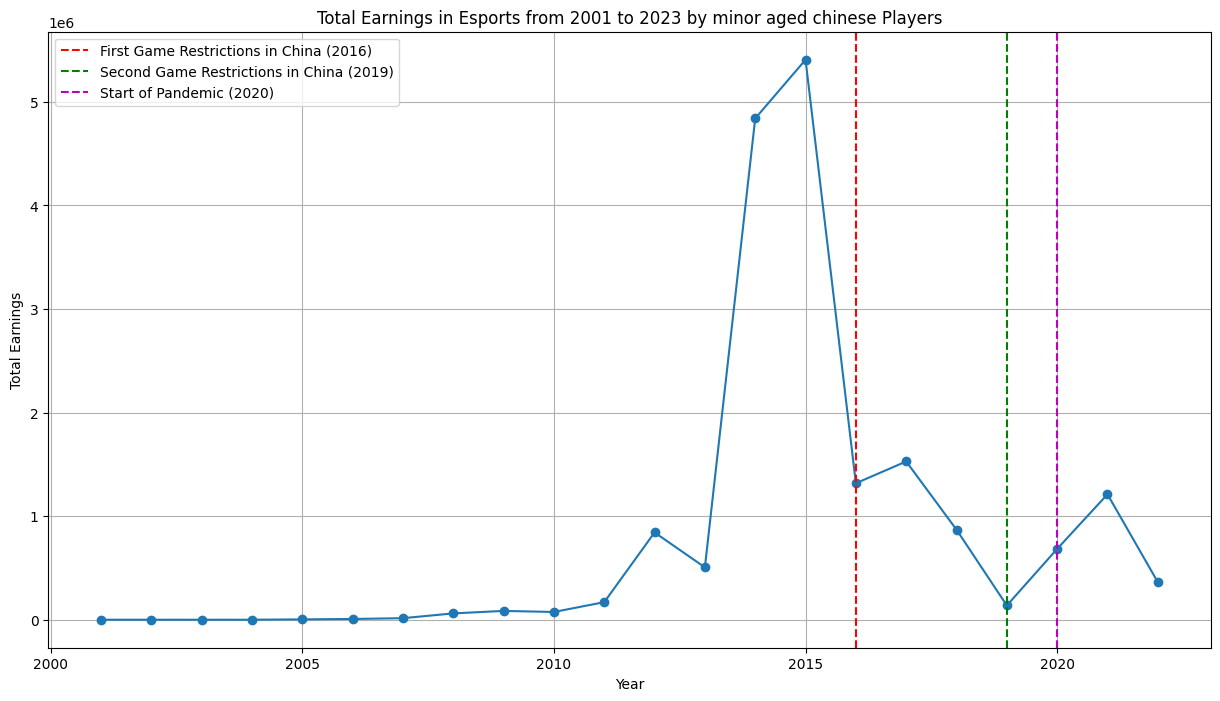

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'players_1000th' and 'df_total_earning_each_year' are already loaded from previous steps
# If not, we would need to load these dataframes from relevant files or recreate them from the provided code

# # First, let's check if 'players_1000th' is available in the current context
# players_1000th_available = 'data' in locals()

# # Now, improving the plotting code
# if players_1000th_available:
#Extract the data from China and the data only from minor aged players
 # Extract year columns from 'players_1000th'
year_columns = [col for col in player_age_revenue.columns if col.startswith('Total_') and col.endswith('_Before_18')]

# Selecting the yearly earnings columns
yearly_earnings = player_age_revenue[year_columns]
# Convert all columns to numeric, non-numeric values are converted to NaN
yearly_earnings = yearly_earnings.apply(pd.to_numeric, errors='coerce')

# Summing up the earnings for each year
total_earnings_by_year = yearly_earnings.sum()
# print(players_1000th[['Total_2003', 'Total_2002', 'Total_2001']])
# print(yearly_earnings[['Total_2003', 'Total_2002', 'Total_2001']])
# print(total_earnings_by_year[['Total_2003', 'Total_2002', 'Total_2001']])
    
# Converting the index to int for better plotting (removing 'Total_' prefix and converting to int)
total_earnings_by_year.index = [int(year.split('_')[1]) for year in total_earnings_by_year.index]
    
# Sorting the index to ensure the years are in chronological order
total_earnings_by_year.sort_index(inplace=True)

# Plotting the time series
plt.figure(figsize=(15, 8))
plt.plot(total_earnings_by_year.index, total_earnings_by_year.values, marker='o')
plt.title('Total Earnings in Esports from 2001 to 2023 by minor aged chinese Players')
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.grid(True)
plt.axvline(x=2016, color='r', linestyle='--', label='First Game Restrictions in China (2016)')
plt.axvline(x=2019, color='g', linestyle='--', label='Second Game Restrictions in China (2019)')
plt.axvline(x=2020, color='m', linestyle='--', label='Start of Pandemic (2020)')
plt.legend()
plt.show()

## UNITED STATES - WITHOUT RESTRICTION